# Start Here

#### We still have our clean dataset saved as "data.csv".

# In-Depth Analysis

#### Importing relevant packages and also load the csv file.

In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
sns.set()

from scipy import stats

data = pd.read_csv('data.csv')

In [371]:
data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# Get Dummies and Train-Test-Split

In [564]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [373]:
data = data[data.price<data.price.quantile(.95)]

In [374]:
price = data.price

In [375]:
df=data.drop(['price', 'latitude', 'longitude', 'neighbourhood'], axis=1)

In [376]:
df = pd.get_dummies(df, prefix_sep='_', drop_first=True)
df.head()

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room
0,1,9,0.21,6,365,1,0,0,0,1,0
1,1,45,0.38,2,355,0,1,0,0,0,0
2,3,0,0.00,1,365,0,1,0,0,1,0
3,1,270,4.64,1,194,1,0,0,0,0,0
4,10,9,0.10,1,0,0,1,0,0,0,0


In [377]:
x_train, x_test, y_train, y_test = train_test_split(df, price, test_size = 0.25, random_state=18)

### Create The Regression Using Train Data

In [378]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [379]:
y_hat = reg.predict(x_train)

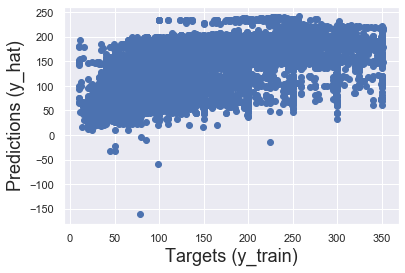

In [380]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

### Root Mean Squared Error (RMSE) - Train Data

In [514]:
#RMSE by setting squared to False
lr_train_rmse = mean_squared_error(y_train, y_hat, squared=False)
print(lr_train_rmse)

53.242754590023054


### R-Squared and Adjusted R-Squared - Train Data

In [382]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [515]:
#R-Squared
lr_train_r2 = reg.score(x_train, y_train)
print(lr_train_r2)

0.45000725090707033


In [384]:
#Adjusted R-Squared
adj_r2(x_train, y_train)

0.4498334625513303

### Mean Absolute Percent Error (MAPE) - Train Data

In [385]:
df_train = pd.DataFrame(y_train.values, columns=['Target'])
df_train['Prediction'] = y_hat
df_train['Residual'] = df_train['Target'] - df_train['Prediction']
df_train['Difference%'] = np.absolute(df_train['Residual']/df_train['Target']*100)

In [386]:
df_train.head()

,Target,Prediction,Residual,Difference%
0,60,67.606857,-7.606857,12.678095
1,85,106.540608,-21.540608,25.341892
2,100,98.814633,1.185367,1.185367
3,100,85.205059,14.794941,14.794941
4,32,148.876863,-116.876863,365.240197


In [518]:
#MAPE
lr_train_mape = df_train['Difference%'].mean()
print(lr_train_mape)

37.82610232280858


### Test data

In [388]:
y_hat_test = reg.predict(x_test)

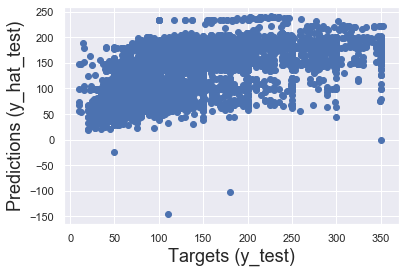

In [389]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

### Root Mean Squared Error (RMSE) - Test Data

In [519]:
#RMSE by setting squared to False
lr_test_rmse = mean_squared_error(y_test, y_hat_test, squared=False)
print(lr_test_rmse)

53.49061544674805


### R-Squared and Adjusted R-Squared - Test Data

In [520]:
#R-Squared
lr_test_r2 = reg.score(x_test, y_test)
print(lr_test_r2)

0.4512471134917443


In [392]:
#Adjusted R-Squared
adj_r2(x_test, y_test)

0.45072660976219436

### Mean Absolute Percent Error (MAPE) - Test Data

In [522]:
#MAPE
df_test = pd.DataFrame(y_test.values, columns=['Target'])
df_test['Prediction'] = y_hat_test
df_test['Residual'] = df_test['Target'] - df_test['Prediction']
df_test['Difference%'] = np.absolute(df_test['Residual']/df_test['Target']*100)

In [524]:
lr_test_mape = df_test['Difference%'].mean()
print(lr_test_mape)

37.961281159447786


### Ridge Regression - Train Data

In [489]:
#Finding optimal Alpha with the best RMSE
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 1.5, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_root_mean_squared_error', cv=10)
ridge_regressor.fit(x_train, y_train)

print(ridge_regressor.best_params_)

{'alpha': 1}


In [526]:
#RMSE
ridge_train_rmse = abs(ridge_regressor.score(x_train, y_train))
print(ridge_train_rmse)

53.24276103362469


In [527]:
#R-Squared
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_train)
ridge_train_r2 = ridge.score(x_train, y_train)
print(ridge_train_r2)

0.4500071177834401


In [480]:
#MAPE
ridge_train = pd.DataFrame(y_train.values, columns=['Target'])
ridge_train['Prediction'] = ridge_pred
ridge_train['Residual'] = ridge_train['Target'] - ridge_train['Prediction']
ridge_train['Difference%'] = np.absolute(ridge_train['Residual']/ridge_train['Target']*100)

In [528]:
ridge_train_mape = ridge_train['Difference%'].mean()
print(ridge_train_mape)

37.82965789496466


### Ridge Regression - Test Data

In [530]:
#RMSE
ridge_test_rmse = abs(ridge_regressor.score(x_test, y_test))
print(ridge_test_rmse)

53.49061017912772


In [532]:
#R-Squared
ridge_test_r2 = ridge.score(x_test, y_test)
print(ridge_test_r2)

0.4512472215713279


In [494]:
#MAPE
ridge_pred_test = ridge.predict(x_test)

ridge_test = pd.DataFrame(y_test.values, columns=['Target'])
ridge_test['Prediction'] = ridge_pred_test
ridge_test['Residual'] = ridge_test['Target'] - ridge_test['Prediction']
ridge_test['Difference%'] = np.absolute(ridge_test['Residual']/ridge_test['Target']*100)

In [533]:
ridge_test_mape = ridge_test['Difference%'].mean()
print(ridge_test_mape)

37.964140922217446


### Lasso Regression - Train Data

In [498]:
lasso = Lasso()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 1.5, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_root_mean_squared_error', cv = 5)
lasso_regressor.fit(x_train, y_train)


C:\Users\KinCodingLaptop\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38147756.8952419, tolerance: 14335.933286593203
  positive)
C:\Users\KinCodingLaptop\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36918051.57772668, tolerance: 14301.26116307836
  positive)
C:\Users\KinCodingLaptop\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38567362.46005659, tolerance: 14416.021144621129
  positive)
C:\Users\KinCodingLaptop\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to inc

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   1.5, 5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [534]:
print(lasso_regressor.best_params_)

{'alpha': 0.01}


In [535]:
#RMSE
lasso_train_rmse = abs(lasso_regressor.score(x_train, y_train))
print(lasso_train_rmse)

53.2430938229256


In [536]:
#R-Squared
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_train)
lasso_train_r2 = lasso.score(x_train, y_train)
print(lasso_train_r2)

0.4500002423954911


In [505]:
#MAPE
lasso_train = pd.DataFrame(y_train.values, columns=['Target'])
lasso_train['Prediction'] = lasso_pred
lasso_train['Residual'] = lasso_train['Target'] - lasso_train['Prediction']
lasso_train['Difference%'] = np.absolute(lasso_train['Residual']/lasso_train['Target']*100)

In [537]:
lasso_train_mape = lasso_train['Difference%'].mean()
print(lasso_train_mape)

37.837853486766505


### Lasso Regression - Test Data

In [539]:
#RMSE
lasso_test_rmse= abs(lasso_regressor.score(x_test, y_test))
print(lasso_test_rmse)

53.48936744274584


In [543]:
#R-Squared
lasso_test_r2 = lasso.score(x_test, y_test)
print(lasso_test_r2)

0.45127271939676916


In [511]:
#MAPE
lasso_pred_test = lasso.predict(x_test)

lasso_test = pd.DataFrame(y_test.values, columns=['Target'])
lasso_test['Prediction'] = lasso_pred_test
lasso_test['Residual'] = lasso_test['Target'] - lasso_test['Prediction']
lasso_test['Difference%'] = np.absolute(lasso_test['Residual']/lasso_test['Target']*100)

In [544]:
lasso_test_mape = lasso_test['Difference%'].mean()
print(lasso_test_mape)

37.96785880449098


### Putting It All Together

In [547]:
print('Linear Regression - Train Data')
print(lr_train_rmse)
print(lr_train_r2)
print(lr_train_mape)

print('Linear Regression - Test Data')
print(lr_test_rmse)
print(lr_test_r2)
print(lr_test_mape)

print('Ridge Regression - Train Data')
print(ridge_train_rmse)
print(ridge_train_r2)
print(ridge_train_mape)

print('Ridge Regression - Test Data')
print(ridge_test_rmse)
print(ridge_test_r2)
print(ridge_test_mape)

print('Lasso Regression - Train Data')
print(lasso_train_rmse)
print(lasso_train_r2)
print(lasso_train_mape)

print('Lasso Regression - Test Data')
print(lasso_test_rmse)
print(lasso_test_r2)
print(lasso_test_mape)


Linear Regression - Train Data
53.242754590023054
0.45000725090707033
37.82610232280858
Linear Regression - Test Data
53.49061544674805
0.4512471134917443
37.961281159447786
Ridge Regression - Train Data
53.24276103362469
0.4500071177834401
37.82965789496466
Ridge Regression - Test Data
53.49061017912772
0.4512472215713279
37.964140922217446
Lasso Regression - Train Data
53.2430938229256
0.4500002423954911
37.837853486766505
Lasso Regression - Test Data
53.48936744274584
0.45127271939676916
37.96785880449098


Looking at the RMSE, R-Squared and MAPE of Linear Regression model vs Ridge and Lasso with hyper-tuning parameter optimizations, I think the Linear Regression model is good as it is.

Going back to the Linear Regression model, below plots show scatterplot of actual values vs predicted values.

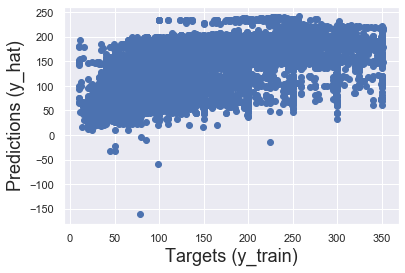

In [548]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

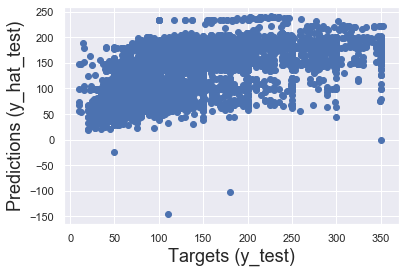

In [550]:
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

Below are scatterplots of predicted values vs residuals

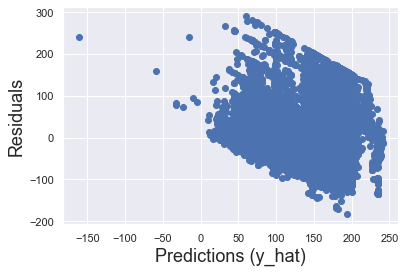

In [561]:
plt.scatter(y_hat, df_train['Residual'])
plt.xlabel('Predictions (y_hat)',size=18)
plt.ylabel('Residuals',size=18)
plt.show()

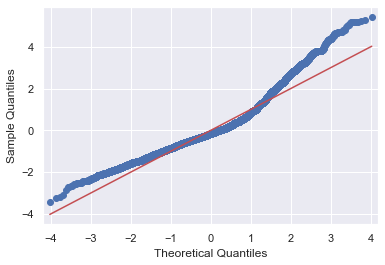

In [565]:
_ = sm.qqplot(df_train['Residual'], fit=True, line='s')

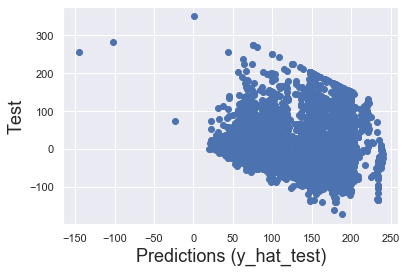

In [562]:
plt.scatter(y_hat_test, df_test['Residual'])
plt.xlabel('Predictions (y_hat_test)',size=18)
plt.ylabel('Test',size=18)
plt.show()

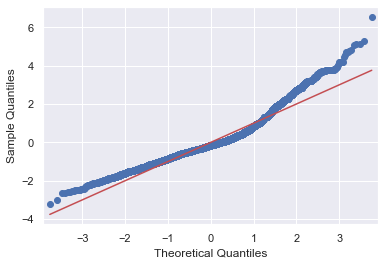

In [566]:
_ = sm.qqplot(df_test['Residual'], fit=True, line='s')

The residual plots and qq plot looks decent.

Below are histograms of the residuals

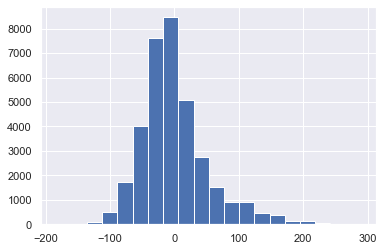

In [568]:
_ = plt.hist(df_train['Residual'], bins = 20)

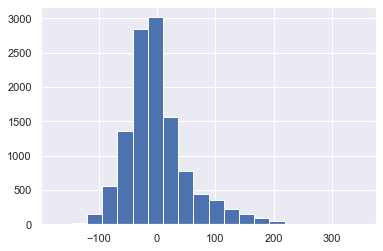

In [569]:
_ = plt.hist(df_test['Residual'], bins = 20)

The histograms looks normal, maybe a slightly right skewed.

## Model Summary

In [586]:
round(reg.intercept_,3)

126.14

In [582]:
reg_summary = pd.DataFrame(df.columns.values, columns=['Features'])
reg_summary['Coefficients'] = reg.coef_
reg_summary['F-statistics'] = f_regression(x_train,y_train)[0].round(3)
reg_summary['P-values'] = f_regression(x_train,y_train)[1].round(3)
reg_summary

,Features,Coefficients,F-statistics,P-values
0,minimum_nights,-0.242368,32.901,0.0
1,number_of_reviews,-0.047594,37.329,0.0
2,reviews_per_month,-0.825077,93.175,0.0
3,calculated_host_listings_count,0.127663,1036.314,0.0
4,availability_365,0.055885,133.450,0.0
5,neighbourhood_group_Brooklyn,22.851811,1158.846,0.0
6,neighbourhood_group_Manhattan,54.261456,4140.439,0.0
7,neighbourhood_group_Queens,11.299690,1000.244,0.0
8,neighbourhood_group_Staten Island,-1.378366,63.120,0.0
9,room_type_Private room,-80.827102,16462.094,0.0


In [585]:
print(lr_train_r2)

0.45000725090707033


In [584]:
adj_r2(x_train, y_train)

0.4498334625513303

In [4]:
print('Dummy varibles were created for neighbourhood_group and room_type. When all features are 0, it is assumed to be located at Bronx for an entire home.')

print('\nThis linear regression model has an intercept of 126.14. So holding all other features to 0, the price of an entire home at Bronx is $126.14.')

print('\nRefer back to the reg_summary chart above, the coefficients of each feature are listed. For example. The coefficient of minimum_nights is -0.242368. For every 1 unit of increment of it will decrease the price by $ 0.24. Looking back at the dummary variables created. The default room type is entire home. Holding all else constant, if the listing is a private room or shared room, the price is expected to decrease by $80.83 or ~$104.34, respectively. Likewise, the default for neighbourhood_group is Bronx, but if the location is in Manhattan, the price is expected to increase up by ~$54.26.')


Dummy varibles were created for neighbourhood_group and room_type. When all features are 0, it is assumed to be located at Bronx for an entire home.

This linear regression model has an intercept of 126.14. So holding all other features to 0, the price of an entire home at Bronx is $126.14.

Refer back to the reg_summary chart above, the coefficients of each feature are listed. For example. The coefficient of minimum_nights is -0.242368. For every 1 unit of increment of it will decrease the price by $ 0.24. Looking back at the dummary variables created. The default room type is entire home. Holding all else constant, if the listing is a private room or shared room, the price is expected to decrease by $80.83 or ~$104.34, respectively. Likewise, the default for neighbourhood_group is Bronx, but if the location is in Manhattan, the price is expected to increase up by ~$54.26.


Looking at the p-values of all feature, they are all very low, which means they are statistically significant.

The R-Squared and Adjusted R-Squared of the model are approximately 0.45, which isn't bad, but there are room for improvement.